In [1]:
from google.colab import auth
import gspread
from google.auth import default
import pandas as pd

auth.authenticate_user()
creds,_=default()
gc=gspread.authorize(creds)

In [2]:
sheet=gc.open('exp 1 dataset').sheet1
data=sheet.get_all_values()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd

In [4]:
df=pd.DataFrame(data[1:],columns=data[0])
df=df.astype({'input':'float'})
df=df.astype({'output':'float'})
df.head()

,input,output
0,1.0,11.0
1,2.0,21.0
2,3.0,31.0
3,4.0,41.0
4,5.0,51.0


In [5]:
X=df[['input']].values
y=df[['output']].values

In [6]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=33)

In [7]:
scaler=MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [8]:
x_trained=scaler.transform(x_train)

In [9]:
ai_brain = Sequential([
    Dense(units = 10, activation = 'relu', input_shape=[1]),
    Dense(units = 19,activation = 'relu'),
    Dense(1)
])

In [10]:
ai_brain.compile(optimizer = 'rmsprop' , loss = 'mse')

In [11]:
ai_brain.fit(x_trained,y_train,epochs=2000)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 30371.1816
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 30360.9277
Epoch 3/2000
1/1 [==============================] - 0s 22ms/step - loss: 30353.5996
Epoch 4/2000
1/1 [==============================] - 0s 26ms/step - loss: 30347.8867
Epoch 5/2000
1/1 [==============================] - 0s 16ms/step - loss: 30342.8398
Epoch 6/2000
1/1 [==============================] - 0s 12ms/step - loss: 30338.2148
Epoch 7/2000
1/1 [==============================] - 0s 33ms/step - loss: 30333.8691
Epoch 8/2000
1/1 [==============================] - 0s 29ms/step - loss: 30329.7656
Epoch 9/2000
1/1 [==============================] - 0s 29ms/step - loss: 30325.8242
Epoch 10/2000
1/1 [==============================] - 0s 26ms/step - loss: 30322.0000
Epoch 11/2000
1/1 [==============================] - 0s 15ms/step - loss: 30318.2910
Epoch 12/2000
1/1 [==============================] - 0s 32ms/step - loss: 30

In [12]:
loss_df = pd.DataFrame(ai_brain.history.history)

<Axes: >

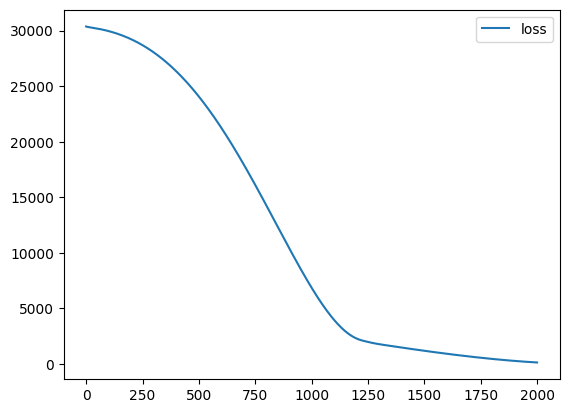

In [13]:
loss_df.plot()

In [14]:
X_test1 = scaler.transform(x_test)

In [15]:
ai_brain.evaluate(X_test1,y_test)

1/1 [==============================] - 0s 362ms/step - loss: 188.3707


188.37069702148438

In [16]:
X_n1=[[4]]

In [17]:
X_n1_1=scaler.transform(X_n1)

In [19]:
ai_brain.predict(X_n1_1)

1/1 [==============================] - 0s 27ms/step


array([[60.797535]], dtype=float32)